# 🦠 Getting started - setup and install

## First, install `miniconda` if you don't have a working `conda` installation

- Download an appropriate `miniconda` installer from here:   
  https://docs.conda.io/en/latest/miniconda.html  
  and follow the instractions.

## Follow the steps to setup a environment for the workshop

1. Create a fresh environment and install `mamba` to speed up subsequent installations
  <br><br>
  `conda create -n eomaps_workshop -c conda-forge python=3.9 mamba --yes`
2. Activate the environment:  
  `activate eomaps_workshop`
3. Install required packages
  <br><br>
  `mamba install -c conda-forge eomaps netcdf4 rioxarray --yes`
4. (optionally) install the `spyder ide`
   <br><br>
  `mamba install -c conda-forge spyder pyzmq=24.0.1 ipython=7.33 --yes`  
  <font size="1">  (using `pyzmq=24.0.1` and `ipython=7.33` avoids autocompletion issues with the latest versions)</font>
5. (optionally) install jupyter lab (and ipympl for interactive inline-plots)
  <br><br>
  `mamba install -c conda-forge jupyterlab ipympl --yes`  
  
5. Wait for all commands to complete and then type `spyder` and hit enter to start the `spyder ide`

----


##### ... or if you prefer to do all in 1 line (requires `mamba` installed in the base-env):
`mamba create -n eomaps_workshop -c conda-forge python=3.9 mamba eomaps netcdf4 rioxarray spyder pyzmq=24.0.1 ipython=7.33 --yes`


----




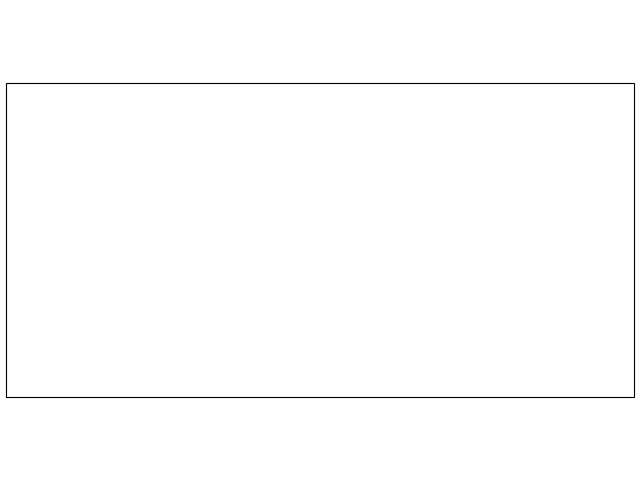

In [8]:
%matplotlib widget
from eomaps import Maps
m = Maps()
m.add_feature.preset.coastline()
m.add_feature.preset.ocean()
m.add_gridlines()

m2 = m.new_inset_map(plot_position=(0.25, 0.5))
m2.add_feature.physical.ocean(fc="b", scale=50)
m2.add_feature.physical.land(fc=".5", scale=50)
m2.add_gridlines(2, c="w")

In [2]:
m2.get_inset_position()

(0.25, 0.5, 0.5)

In [7]:
m2.set_inset_position(.25, .5, .4)

In [4]:
m2.set_inset_position(*m2.get_inset_position())